<font color='green'>
    
**Deep Learning Tutorial for Beginners 을 시작 해보겠습니다.** 
    
* 이 노트북은 Data ScienceTutorial for Beginners(https://github.com/wowhb/Data-Science-Tutorial-for-Beginners) 를 이어서 작성하는 것으로 Deep Learning Tutorial 이라고 생각하시면 됩니다. kaggle 의 DATAI팀의 작업물은 번역 및 보완 한 노트북입니다.
    
* 이번 노트북에서 기본적인 모든 것을 하나하나 설명하려고 합니다.     
* 키워드를 중심으로 정의합니다.
* 이 튜토리얼의 끝에는 딥러닝에 대한 충분한 정보가 수록되어 있어 더 깊이 학습할 수 있습니다.
* 내용을 살펴보겠습니다. 먼저 컨텐츠의 구성 목차를 보고 시작하세요.

<font color='red'>
<br>Content:
    
* [Introduction](#1)
* [Overview the Data Set](#2)
* [Logistic Regression](#3)
    * [Computation Graph](#4)
    * [Initializing parameters](#5)
    * [Forward Propagation](#6)
        * Sigmoid Function
        * Loss(error) Function
        * Cost Function
    * [Optimization Algorithm with Gradient Descent](#7)
        * Backward Propagation
        * Updating parameters
    * [Logistic Regression with Sklearn](#8)
    * [Summary and Questions in Minds](#9)
    
* [Artificial Neural Network](#10)
    * [2-Layer Neural Network](#11)
        * [Size of layers and initializing parameters weights and bias](#12)
        * [Forward propagation](#13)
        * [Loss function and Cost function](#14)
        * [Backward propagation](#15)
        * [Update Parameters](#16)
        * [Prediction with learnt parameters weight and bias](#17)
        * [Create Model](#18)
    * [L-Layer Neural Network](#19)
        * [Implementing with keras library](#22)
* Time Series Prediction: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
* [Artificial Neural Network with Pytorch Library](#23)
* [Convolutional Neural Network with Pytorch Library](#24)
* [Recurrent Neural Network with Pytorch Library](#25)
* [Conclusion](#20)



<a id="1"></a> <br>
# INTRODUCTION
* **Deep learning:** One of the machine learning technique that learns features directly from data. 정의 그대로 데이터에서 직접 기능을 학습하는 머신러닝 기법 중 하나입니다.  
  
* **Why deep learning:** 데이터의 양이 증가하면, 머신러닝은 성능 면에서 불충분하고 딥러닝은 정확성과 같은 성능면에서 더 나은 성능을 제공합니다.
<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>
* **What is amounth of big:** 대답하기 어렵지만 직관적으로 100만 개의 샘플이 "빅데이터"라고 말하기에 충분합니다.  
* **Usage fields of deep learning:** 음성 인식, 이미지 분류, 자연어 처리(nlp) 또는 추천 시스템 등등이 있습니다.
* **What is difference of deep learning from machine learning:** 
    * 머신러닝은 딥러닝을 커버합니다.
    * 머신러닝에서는 feature 가 수동으로 학습을 실시합니다.
    * 한편, 딥러닝은 데이터로부터 직접 feature를 학습합니다.
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>

<br>데이터를 먼저 살펴보겠습니다

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd() #제가 작업하고 있는 경로를 먼저 파악합니다.

'C:\\Users\\BIN\\Deep Learning Tutorial for Beginners'

In [3]:
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'Deep Learning Tutorial for Beginners.ipynb', 'X.npy', 'X.npy.zip', 'Y.npy']


In [4]:
# 제가 불러올 데이터의 경로를 파악합니다. 
print('X.npy.zip')
print(os.path.realpath('X.npy.zip'))
print(os.path.abspath('X.npy.zip'))

X.npy.zip
C:\Users\BIN\Deep Learning Tutorial for Beginners\X.npy.zip
C:\Users\BIN\Deep Learning Tutorial for Beginners\X.npy.zip


In [5]:
path = "./"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['.ipynb_checkpoints', 'Deep Learning Tutorial for Beginners.ipynb', 'X.npy', 'X.npy.zip', 'Y.npy']


In [6]:
for dirname,_,filenames in os.walk('C:\\Users\\BIN\\Deep Learning Tutorial for Beginners') :
    for filename in filenames :
        print(os.path.join(dirname, filename))

C:\Users\BIN\Deep Learning Tutorial for Beginners\Deep Learning Tutorial for Beginners.ipynb
C:\Users\BIN\Deep Learning Tutorial for Beginners\X.npy.zip
C:\Users\BIN\Deep Learning Tutorial for Beginners\Y.npy
C:\Users\BIN\Deep Learning Tutorial for Beginners\.ipynb_checkpoints\Deep Learning Tutorial for Beginners-checkpoint.ipynb
C:\Users\BIN\Deep Learning Tutorial for Beginners\X.npy\X.npy


<a id="Overview the Data Set"></a> <br>
# Overview the Data Set
* 본 튜토리얼에는 "sign language digits data set"를 사용할 것이다.  
* 이 데이터에는 2062개의 수화 숫자 이미지가 있습니다.  
* 알다시피 숫자는 0에서 9까지 입니다. 따라서 10개의 독특한 표지판이 있습니다.  
* 튜토리얼의 시작 부분에서는 단순성을 위해 sign 0과 1만 사용할 것입니다.  
* 데이터에서 0은 index 204와 408 사이에 있습니다. 0의 index의 개수는 205입니다.  
* 또한 1은 index 822와 1027 사이에 있습니다. 1개의 sign은 206개입니다. 따라서 각 classes(레이블)에서 205개의 샘플들을 사용할 것입니다.
* 참고: 실제로 205개의 샘플은 딥러닝에 매우 적습니다. 하지만 이것은 튜토리얼이기 때문에 그다지 중요하지 않습니다.
* X 및 Y array를 준비하겠습니다. 
* X는 이미지 array(0과 1의 sign)이고 Y는 레이블 배열(0과 1)이다.


#### 간단하게 직관적으로 설명해 보자면 X 이미지 (레이블이 0과 1뿐인) 를 가지고 훈련을 시키고 이미지를 보고 그 수화이미지가 가르키는게 0인지 1인지를 분류하는 작업이라고 생각하면 됩니다. 

(-0.5, 63.5, 63.5, -0.5)

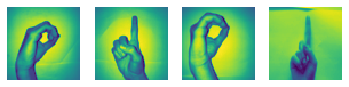

In [7]:
# load data set
# 0은 index 204와 408 사이에 있습니다
# 1은 index 822와 1027 사이에 있습니다 
# 하나씩 임의로 불러와서 확인해 보겠습니다
x_l = np.load('X.npy\X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 4, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(x_l[204].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(x_l[1027].reshape(img_size, img_size))
plt.axis('off')

* image array를 생성하기 위해서 sign 0 과 sign 1 array 를 연결해야 합니다.
* 그런다음 0 sign 의 image 에는 0이라는 레이블을 1 sign 의 image 에는 1이라는 레이블을 부여해야합니다.

In [8]:
# 행 축을 따라 array 순서를 결합합니다
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
# index 0부터 204 까지는 label 0 을 205 부터 410 까지는 label 1 을 부여합니다.
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* X의 shape은 (410, 64, 64)
    * 410은 우리가 410개의 이미지를 가지고 있다는 것을 의미합니다. (0과 1개의 sign)
    * 64는 이미지 크기가 64x64(64x64픽셀)임을 의미합니다
* Y의 shape (410,1))
    *  410은 우리가 410개의 라벨을 가지고 있다는 것을 의미합니다. (0과 1)
* X와 Y를 train sets 와 test sets 로 나누겠습니다.
    * test_size = test = 15%, train = 75%
    * random_state = 랜덤화하면서 동일한 시드 사용합니다. train_test_split를 반복해서 부르면 항상 같은 train과 test분포를 만들어 낸다는 뜻인데, 이는 우리가 같은 random_state를 가지고 있기 때문입니다.

In [9]:
# 그런 다음 x_train, y_train, x_test, y_test 들 array를 생성합니다
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [10]:
print(X_train.shape[0])
print(X_test.shape[0])

348
62


* 이제 우리는 3차원 input array(X)을 가지고 있으므로 첫 번째 딥러닝 모델의 입력으로 사용하기 위해서는 flatten(2D)을 만들어야 합니다.
* 우리의 레이블 array(Y)은 이미 flatten(2D) data 이기 때문에 그대로 둡니다.
* X data 를 flatten 해보겠습니다.


In [11]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* 보시다시피, 우리는 348개의 이미지를 가지고 있고 각각의 이미지는 4096개의 픽셀을 가지고 있습니다.
* 또한 우리는 62개의 이미지를 가지고 있고 각각의 이미지는 4096개의 픽셀을 가지고 있습니다.

In [12]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
    
지금까지 진행한 사항:  
    
* sign 0과 sign1 을 선택하고 그에 대응하는 label 0 과 1 을 연결시켰습니다.
* train set과 test set으로 나누고 flatten data 로 변형시켰습니다.
* 최종적으로 우리의 input과 output 은 다음 그림으로 표현해보겠습니다:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
# Logistic Regression
* 이진분류(0과 1 출력)를 이야기할 때 가장 먼저 떠오르는 것은 로지스틱 회귀입니다.
* 그러나 딥러닝 튜토리얼에서는 로지스틱 회귀 분석을 어떻게 해야 할까요?
* 해답은 로지스틱 회귀는 사실 매우 단순한 신경망이라는 것입니다.
* 그런데 신경망과 딥러닝은 같은 것입니다. "deep"과 같은 용어에 대해 자세히 설명할 것입니다.
* 로지스틱 회귀(단순 딥러닝)를 이해하기 위해 먼저 Computation Graph를 학습해보겠습니다.

<a id="4"></a> <br>
##  Computation Graph
* Computation graphs 는 수학적 표현에 대해 생각해보는 좋은 방법입니다.
* 수학적 표현을 시각화하는 것과 같습니다.
* 예를들자면   
  $$c = \sqrt{a^2 + b^2}$$
* 보다시피 우리는 수학을 그래프로 표현합니다.
<a href="http://imgbb.com/"><img src="http://image.ibb.co/hWn6Lx/d.jpg" alt="d" border="0"></a>

* 이제 로지스틱 회귀 분석의 computation graph 를 살펴봅시다.
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * Parameters 는 weight 와 bias 입니다.
    * Weights: coefficients(계수) of each pixels
    * Bias: intercept
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias 
    * 다시말하자면 => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid function은 z를 0과 1 사이로 만들 확률입니다. computation graph에서 sigmoid 함수를 볼 수 있습니다.
* Why we use sigmoid function?
    * 확률론적 결과를 제공합니다.
    * gradient descent algorithm에서 사용할 수 있습니다 (곧 알게 될것입니다.)
* 예를 들어보겠습니다:
    * z = 4를 찾아 z를 sigmoid 함수에 넣었다고 가정하겠습니다. 결과(y_head)는 거의 0.9입니다. 그것은 우리의 분류 결과가 90% 확률로 1이라는 것을 의미합니다.
* 이제 처음부터 computation graph의 각 구성 요소를 하나하나 자세히 살펴보겠습니다.

<a id="5"></a> <br>
## Initializing parameters
* 알다시피 입력은 4096픽셀(x_train의 각 이미지)
* 각 각의 픽셀은 자체의 weight 가 있습니다
* 첫 번째 단계는 각각의 픽셀에 각각의 weight를 곱하는 것이다.
* 문제는 가중치의 초기 값은 무엇일까요?
    * 인공신경망에서 설명할 기법도 있지만, 이때의 초기 weight는 0.01입니다
    * weight는 0.01인데 weight array shape은? 로지스틱 회귀 분석의 computation graph에서 이해한 바와 같이 (4096,1) 입니다
    * 또한 초기 bias는 0입니다.
* 코드를 좀 써보겠습니다.

In [13]:
# 정의의 간단한 설명 및 예
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# 매개 변수를 초기화할 수 있습니다
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [14]:
#w,b = initialize_weights_and_bias(4096)

<a id="6"></a> <br>
## Forward Propagation
* 픽셀부터 비용까지 모든 단계를 forward propagation 라 합니다.
    * z = (w.T)x + b => 이 방정식에서 우리는 픽셀 array인 x를 알고 있고, w(weight)와 b(bias)를 알고 있으므로 나머지는 계산입니다.(T is transpose)
    * 그런 다음 y_head(확률)를 반환하는 sigmoid 함수에 z를 넣습니다. 헷갈리신다면 가서 computation graph를 다시 보십시오. 또한 sigmoid 함수의 방정식은 computation graph에 있습니다.
    * 그런 다음 손실(Loss) 함수를 계산합니다.
    * 비용(Cost) 함수는 모든 손실(오류)의 합입니다.
    * z와 입력 매개 변수로 z를 가져오고 y_head(확률)를 반환하는 쓰기 sigmoid 정의(방법)로 시작해보겠습니다

In [15]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [16]:
y_head = sigmoid(0)
y_head

0.5

* Sigmoid method를 작성하고 y_head를 계산하면서 손실(오류) 기능이란 무엇인지 알아보겠습니다
* 예를 들어, 하나의 이미지를 input으로 넣은 후 weight를 곱하고 bias를 추가하여 z를 찾도록 합니다. 그런 다음 z를 sigmoid method에 넣어 우리가 y_head를 찾을 수 있도록 합니다. 그 후 y_head가 0.5보다 큰 0.9가 되었기 때문에 이미지 하나가 sign하는 것이 우리의 예측입니다. 그런데 우리의 예측이 맞느냐, 틀리느냐, 어떻게 확인하느냐. 정답은 손실(loss) function입니다::
    * 로그 loss(오류) function의 수학적 표현은 다음과 같습니다: 
    <a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="duzeltme" border="0"></a>
    * 잘못 예측하면 손실(오류)이 커집니다. **DENKLEM DUZELTME**
        * Example: 우리의 실제 이미지는 sign 1이고 그 label은 1(y = 1)이며, 그 다음 우리는 예측 y_head = 1을 만듭니다. y와 y_head를 손실(loss) 방정식에 넣었을 때 결과는 0이게 됩니다. 우리는 정확한 예측을 하기 때문에 우리의 loss는 0입니다. 그러나 y_head = 0과 같이 잘못된 예측을 하면 loss(오류)은 무한대가 되게 됩니다.
* 그 후 비용함수는 손실함수의 합입니다. 각각의 이미지는 손실 기능을 만듭니다. 비용 함수는 각 입력 이미지에 의해 생성되는 손실 함수의 합입니다.
* forward propagation 를 구현해 보겠습니다.


In [17]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

<a id="7"></a> <br>
##  Optimization Algorithm with Gradient Descent
* 이제 우리는 오류인 loss 와 cost 가 무엇인지 알게 되었습니다
* 즉, cost 가 높으면 우리가 잘못 예측한다는 것을 의미하기 때문에 cost를 줄여야 합니다
* 모든 것은 weight 와 bias 를 초기화하는 것으로부터 시작됨을 생각해 봅시다. 즉, 모든것은 그것들에 게 달려있습니다
* cost 를 낮추기 위해서는 weight 와 bias 를 조절하고 갱신해야 합니다
* 다시 말해, 우리의 모델은 비용 기능을 최소화하는 모수 weight와 bias에 대해 배울 필요가 있습니다. 이 기법을 gradient descent 라고 합니다.
* 예를 들어보겠습니다:
    * 우리는 w = 5와 bias = 0을 가지고 있습니다(그러므로 일단은 bias은 무시합니다). 그리고 나서 우리는 Forward propagation를 하고 우리의 cost function은 1.5입니다다.
    * 이것을 보세요. (빨간줄)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * 그래프에서 볼 수 있듯이, 우리는 최소 비용 함수가 아닙니다. 그러므로 우리는 최소한의 비용을 지불하는 것이 목적입니다. 그러면 weight를 업데이트 합시다. (:= 업데이트 중이라는 기호로 사용하겠습니다)
    * w := w - step. 문제는 이 단계가 무엇인가 하는 것입니다. slope1을 보십시오. 최소점을 찾기 위해서, 우리는 slope1을 사용할 수 있습니다. 그럼 slope1 = 3이라고 하고 weight를 업데이트해보죠. w := w - slope1 => w = 2.
    * 이제 우리 weight w는 2입니다. 기억하시겠지만, 우리는 Forward propagation를 통해 비용 기능을 다시 찾아야 합니다. 
    * w = 2를 사용한 Forward propagation에 따라 비용 함수는 0.4라고 합시다. 흠, 우리의 비용 기능이 감소하기 때문에 우리는 올바른 길을 가고 있다고 볼 수 있습니다. 우리는 비용 = 0.4인 비용 함수에 대한 새로운 값을 가지고 있지만 그게 충분한지 모르겠습니다 한 걸음 더 해보겠습니다.
    * Slope2 = 0.7 그리고 w = 2. weight w : = w - step(slope2) => w = 1.3 로 업데이트 하고 새로운 비용함수를 찾아보겠습니다
    * w = 1.3과 우리의 비용 = 0.3으로 한 번 더 Forward propagation를 만드세요. 괜찮아 보이는데, 충분한가요? 아니면 한 번 더 가야 할까요? 대답은 모른다는 겁니다, 한번 더 해보죠.
    * Slope3 = 0.01 그리고 w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. 그래서 우리는 최소한의 비용 기능을 찾기 때문에 weight는 변하지 않습니다.
    * 모든 것이 좋아 보이는데 어떻게 slope를 찾을 수 있을까요? 고등학교나 대학교 때 기억한다면, 주어진 지점에서 기능(비용 함수)의 기울기를 찾기 위해 우리는 주어진 지점에서 미분을 취합니다. 또한 당신은 우리가 경사를 찾을 수 있지만 그것이 어디로 가는지 어떻게 알 수 있는지 물어볼 수 있습니다. 최소로 가는 대신에 더 높은 비용 값으로 갈 수 있다고 말할 수 있습니다. 경사(미분값)는 발걸음과 방향을 동시에 주는 것입니다다. 그러므로 걱정하지 마십시오.
    * 업데이트 방정식은 이렇습니다. 비용함수(weight과 bias)가 있다고 합시다. weight와 bias에 따라 비용 함수의 미분함수를 취합니다. 그런 다음 α 학습 비율로 곱하십시오. 그런 다음 weight를 업데이트하십시오. (설명하기 위해 편향은 무시하지만 이 모든 단계는 편향에 적용됨).
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * 이제, 제가 말한 적 없는 학습율이 얼마인지 묻고 있을 것입니다. 그것은 학습율을 결정하는 매우 간단한 용어입니다. 빨리 배우는 것과 배우지 않는 것 사이에는 절충이 있습니다. 예를 들어 당신은 지금 파리에 있고 마드리드에 가고 싶어 한다고 합시다. 스피드가 작으면 마드리드에 아주 천천히 갈 수 있고 시간이 너무 오래 걸립니다. 반면에, 만약 당신의 속도가 크다면, 당신은 매우 빨리 갈 수 있지만 아마도 당신은 추락해서 마드리드에 가지 않을 수도 있습니다. 그러므로 우리는 우리의 속도(학습 속도)를 현명하게 선택할 필요가 있습니다.
    * 학습율은 선택과 조정이 필요한 하이퍼 파라미터라고도 합니다. 다른 하이퍼 파라미터와 함께 인공신경망에서 더 자세히 설명하겠습니다. 
  
* 나는 이제 당신은 (weight과 bias에서 cost에 이르기까지) Forward propagation와 (cost에서 weight과 bias으로) backwork propagation의 논리를 이해했다고 생각합니다. 또한 경사하강도 배웁니다. 코드를 구현하기 전에 weight와 bias에 따라 cost 함수의 미분 요소를 취하는 방법에 대해 한 가지 더 배울 필요가 있습니다. 그것은 파이썬이나 코딩과는 관련이 없습니다. 그것은 순수한 수학입니다. 
$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [18]:
# backward propagation 시 foward propagation 에서 발견된 y_head 를 사용합니다
# 그러므로backward propagation을 쓰지 말고, foward propagation와 backward propagation를 결합하겠습니다
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

* 여기까지 학습한 것
    * 파라미터 초기화
    * forward propagation 및 cost function 으로 cost 찾기
    * parameters (weight and bias) 업데이트. 
    
* 이제 구현해보겠습니다

In [19]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters 는 number_of_iterarion times 입니다
    for i in range(number_of_iterarion):
        # forward 와 backward propagation 그리고 cost 와 gradients 찾습니다
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # weights 와 bias 를 업데이트 합니다
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

* 여기까지 우리는 우리의 parameters 를 배웁니다. 그건 우리가 data를 적합시킨다는 것을 의미합니다
* 예측을 위한 parameter가 있습니다 그러므로 예측해보겠습니다
* 예측 단계에서는 x_test 를 입력으로 하고 사용하면서 foward propagation 을 합니다

In [20]:
 # prediction
def predict(w,b,x_test):
    # forward propagation를 하기 위해 x_test 가 input 입니다 
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # z가 0.5보다 크면 sign 1(y_head=1)이 예측됩니다.
    # z가 0.5보다 작으면 sign 0(y_head=0)이 예측됩니다
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

* 우리는 예측을 만들었습니다.
* 이제 그것들을 모두 합치겠습니다

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


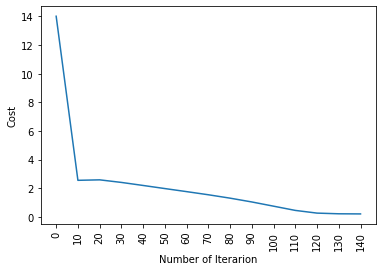

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [21]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # 초기화
    dimension =  x_train.shape[0]  #  4096
    w,b = initialize_weights_and_bias(dimension)
    # learning rate(학습률) 을 바꾸지 않았습니다
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors(loss를 출력)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

* 우리는 단순 신경망(논리적 회귀)의 이면에 있는 논리와 구현 방법을 배웁니다.
* 논리적인 것들을 배웠기 때문에 로지스틱 회귀 분석을 위해 모든 단계를 손으로 실행하는 것보다 쉬운 sklearn 라이브러리를 사용해서 더욱 더 쉽게 해보겠습니다.



<a id="8"></a> <br>
## Logistic Regression with Sklearn
* sklearn library에서는 로지스틱 회귀법을 쉽게 구현할 수 있는 로지스틱 회귀법이 있습니다.
* 나는 sklearn에서 로지스틱 회귀의 각 매개변수를 설명하지 않을 것입니다. 그러나 만약 당신이 원한다면 여기서 읽을 수 있습니다 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 정확도는 우리가 발견한 것과 다르다. 로지스틱 회귀 분석 방법은 다른 최적화 매개변수나 정규화처럼 사용하지 않는 다양한 feature을 많이 사용하기 때문입니다.
* 로지스틱 회귀의 결론을 내리고 인공신경망으로 계속 진행해봅시다.

In [22]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


<a id="9"></a> <br>
## Summary
<font color='purple'>
    
우리가 첫번 째 파트에서 한 것들은 다음과 같습니다:

* parameters초기화 즉 weight and bias 초기화
* Forward propagation
* Loss function
* Cost function
* Backward propagation (gradient descent)
* 학습된 parameters, weight 와 bias 를 사용한 예측
* Logistic regression with sklearn

<a id="10"></a> <br>
# Artificial Neural Network (ANN)
* 이것은 deep neural network 또는 deep learning 이라고 합니다
* **What is neural network:** (신경망이란?) 기본적으로 로지스틱 회귀 분석을 취하여 최소 2회 이상 반복하는 것입니다.
* 로지스틱 회귀 분석에서는 입력 및 출력 계층이 있습니다. 그러나 신경망에서는 입력층과 출력층 사이에 적어도 하나의 숨은 층이 존재합니다. 이를 hidden layer 라고도 부릅니다.
* **깊이, 내가 얼마나 많은 층을 가져야 하는지를 말하기 위해, 무엇이 깊은것 일까:** 선생님께 서 이 질문을 할 때, 그는 "깊이"는 상대적인 용어라고 말했습니다; 물론 그것은 얼마나 많은 숨겨진 층을 가지고 있는지를 의미하는 네트워크의 "깊이"를 말합니다. "너의 수영장은 얼마나 깊니?"가 12피트일 수도 있고, 2피트일 수도 있습니다. 그럼에도 불구하고, 그것은 여전히 깊이가 있습니다. 그것은 "깊이"의 질을 가지고 있다. 32년 전에는 두세 겹의 숨겨진 층을 사용했었습니다. 그것이 당시의 전문 하드웨어의 한계였습니다. 불과 몇 년 전만 해도 20개 층이 꽤 깊은 것으로 여겨졌습니다. 10월에 앤드류 응은 152개의 층이 그가 알고 있는 가장 큰 상업 네트워크 중 하나라고 언급했었습니다. 
* **Why it is called hidden:** 숨겨진 계층이 입력을 보지 못하기 때문에(train set)

* 2층 신경망을 봐보겠습니다: 
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* Step by step we will learn this image.
    * 보다시피 입력 계층과 출력 계층 사이에는 하나의 숨겨진 계층이 있습니다. 그리고 이 숨겨진 계층은 3개의 노드를 가지고 있습니다. 노드 3의 번호를 선택하는 이유가 궁금하다면 이유는 없고, 나는 오직 개수만 선택합니다. 노드 수는 학습 속도와 같은 하이퍼 파라미터 입니다. 따라서 우리는 인공 신경망의 끝에서 하이퍼 파라미터를 보게 될 것입니다.
    * 입력 및 출력은 변하지 않습니다. 그것들은 로지스틱 회귀와 같습니다.
    * 이미지에는 당신에게 알려지지 않은 tanh 함수가 있습니다. 그것은 Sigmoid function과 같은 활성화 함수입니다. Tanh 활성화 함수는 hidden units 에 대해 sigmoid보다 더 좋습니다. 왜냐하면 그것의 출력의 평균은 0에 가까워서 다음 레이어에 더 잘 데이터를 배치하기 때문입니다. 또한 tanh 활성화 함수는 우리의 모델 학습을 더 좋게 하는 비선형성을 증가시킵니다.
    * 보라색으로도 알 수 있듯이 두 부분이 있습니다. 두 부분 모두 로지스틱 회귀와 같습니다. 유일한 차이점은 활성화 함수, 입력 및 출력입니다.
        * logistic regression: input => output
        * 2 layer neural network: input => hidden layer => output. 숨겨진 계층은 파트 1의 출력이고 파트 2의 입력이라고 생각할 수 있습니다.
* 그뿐입니다. 우리는 2층 신경망에 대한 로지스틱 회귀와 같은 경로를 따를 것입니다.
   
    
    

<a id="11"></a> <br>
## 2-Layer Neural Network
* parameters weights and bias 초기화 그리고 layers 의 size
* Forward propagation
* Loss function 과 Cost function
* Backward propagation
* Update Parameters
* 학습된 parameters weight 와 bias 를 사용한 예측
* Create Model

<a id="12"></a> <br>
## Size of layers and initializing parameters weights and bias


* 샘플이 348개인 x_train의 경우 

$x^{(348)}$: $$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$


* * 로지스틱 회귀 분석에서는 weight 0.01과 bias 0을 초기화 했습니다. 이때 우리는 무작위로 weight를 초기화합니다. 왜냐하면 우리가 parameter 0을 초기화하면 첫 번째 숨겨진 층의 각 뉴런은 동일한 계산을 수행할 것이기 때문입니다. 따라서, 여러 차례 반복적으로 경사 하강 시킨 후에도 층에 있는 각 뉴런은 다른 뉴런과 같은 것들을 계산하게 될 것입니다. 따라서 무작위로 초기화합니다. 또한 초기 weight는 작을 것입니다. 초기에 크기가 매우 크면 이는 tanh의 입력을 매우 크게 하여 경사가 0에 가깝게 됩니다. 즉, 최적화 알고리즘이 느릴 것입니다.

* Bias 처음부터 0이 될 수 있습니다

In [23]:
# parameters weights and bias 초기화 그리고 layers 의 size
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## Forward propagation
* Forward propagation 는 로지스틱 회귀 분석과 거의 같습니다.
* 단 한가지 차이점은 tanh 함수를 사용하고 모든 과정을 두 번 만든다는 것입니다.
* 또한 numpy 는 tanh function을 가지고 있습니다. 따라서 우리는 그것을 별도로 시행할 필요가 없습니다

In [24]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="14"></a> <br>
## Loss function and Cost function
* 손실 및 비용 함수는 로지스틱 회귀 분석과 동일합니다
* Cross entropy function (교차 엔트로피 함수)
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [25]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## Backward propagation
* 알다시피 backward propagation 는 미분을 의미합니다

In [26]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## Update Parameters 
* parameters 업데이트도 로지스틱 회귀 분석과 동일합니다
* 우리는 로지스틱 회귀 분석으로 많은 작업을 수행했습니다

In [27]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
## Prediction with learnt parameters weight and bias
* 로지스틱 회귀 분석과 같은 예측 방법을 쓰겠습니다

In [28]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Create Model
* 그것들을 모두 합쳐보겠습니다

Cost after iteration 0: 0.368301
Cost after iteration 100: 0.329046
Cost after iteration 200: 0.286103
Cost after iteration 300: 0.227233
Cost after iteration 400: 0.172924
Cost after iteration 500: 0.133718
Cost after iteration 600: 0.107151
Cost after iteration 700: 0.088694
Cost after iteration 800: 0.075215
Cost after iteration 900: 0.064847
Cost after iteration 1000: 0.056493
Cost after iteration 1100: 0.049548
Cost after iteration 1200: 0.043699
Cost after iteration 1300: 0.038764
Cost after iteration 1400: 0.034601
Cost after iteration 1500: 0.031079
Cost after iteration 1600: 0.028085
Cost after iteration 1700: 0.025523
Cost after iteration 1800: 0.023315
Cost after iteration 1900: 0.021399
Cost after iteration 2000: 0.019726
Cost after iteration 2100: 0.018257
Cost after iteration 2200: 0.016961
Cost after iteration 2300: 0.015811
Cost after iteration 2400: 0.014787


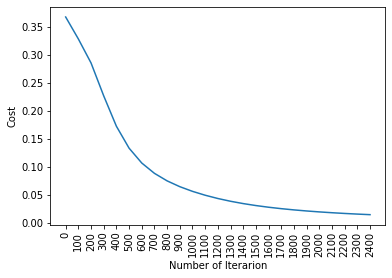

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [29]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # train/test Error들을 출력합니다
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<font color='purple'>
여기까지 우리는 2층 신경망을 만들고 구현하는 방법을 배웠습니다.
* parameters weights and bias 초기화 그리고 layers 의 size
* Forward propagation
* Loss function 과 Cost function
* Backward propagation
* Update Parameters
* 학습된 parameters weight 와 bias 를 사용한 예측
* Create Model

<br> 이제 keras 로 L층 신경망을 구현하는 방법을 배워보겠습니다

<a id="19"></a> <br>
# L Layer Neural Network
* **hidden layer가 증가하면 어떻게 될까요?:** 이전 layer들은 간단한 feature들을 감지할 수 있습니다.
* 간단한 feature를 후기 신경망 층에서 함께 모델화 하여 더욱 복잡한 function을 학습할 수 있습니다. 예를들어 우리의 간단한 예를 봅시다.(sign1)
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* 예를 들어, 첫 번째 숨겨진 층은 가장자리나 선과 같은 기본 모양을 학습합니다. 층수가 증가하면, 층들은 볼록한 모양이나 집게손가락과 같은 특징과 같은 더 복잡한 것들을 배우기 시작합니다.
* 모델을 생성해 봅시다
    * 학습 속도, 반복 횟수, 숨겨진 계층 수, 숨겨진 단위 수, 활성화 함수 유형 등 우리가 선택해야 하는 일부 하이퍼 파라미터가 있습니다(earning rate, number of iterations, number of hidden layer, number of hidden units, type of activation functions)
    * 이러한 하이퍼 파라미터는 딥러닝 세계에서 많은 시간을 보낸다면 연속적으로 선택될 수 있습니다
    * 이 튜토리얼에서 우리 모델은 각각 8개 노드와 4개의 노드를 가진 2개의 숨겨진 계층을 가질 것입니다. 숨겨진 계층과 노드의 수가 증가하면 시간이 너무 많이 걸리기 때문입니다.
    * 활성화 기능으로 각각 relu(첫 번째 숨김 계층), relu(두 번째 숨김 계층), sigmoid(출력 계층)를 사용합니다.
    * 반복 횟수는 100회 입니다.(iteration )
* 우리의 방법은 이전 부분과 동일하지만, 당신이 딥러닝의 이면에 있는 논리를 배우면, 우리는 우리의 일을 쉽게 할 수 있고 더 깊은 신경망을 위해 케라스 라이브러리를 사용할 수 있습니다.
* 먼저 우리의 x_train, x_test, y_train and y_test 들을 reshape 합니다

    
    

In [30]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<a id="22"></a> <br>
## Implementing with keras library
케라스 라이브러리의 몇 가지 parameter를 살펴보십시오.:
* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, 여기서 우리는 relu 를 사용합니다
* input_dim: 이미지의 픽셀 수인 입력 치수(4096 px)
* optimizer: 우리는 adam optimizer 를 사용합니다
    * Adam 은 신경망 훈련을 위한 가장 효과적인 최적화 알고리즘 중 하나입니다.
    * Adam의 몇 가지 장점은 상대적으로 낮은 메모리 요구 사항과 일반적으로 하이퍼 파라미터의 조정이 거의 없더라도 잘 작동한다는 것입니다.
* loss: Cost function 과 같습니다. 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$
* metrics: it is accuracy.
* cross_val_score: 교차검증을 사용합니다. 차 검증을 모를 경우 기계 학습 튜토리얼에서 확인하십시오. https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* epochs: number of iteration

In [31]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # 신경망 라이브러리를 초기화합니다.
from keras.layers import Dense 
def build_classifier():
    classifier = Sequential() # neural network 를 초기화 합니다
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
232/232 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4526
Epoch 2/100
232/232 [==============================] - 0s 121us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 108us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 116us/step - loss: 0.6918 - accuracy: 0.5474
Epoch 5/100
232/232 [==============================] - 0s 138us/step - loss: 0.6905 - accuracy: 0.5603
Epoch 6/100
232/232 [==============================] - 0s 121us/step - loss: 0.6887 - accuracy: 0.8147
Epoch 7/100
232/232 [==============================] - 0s 116us/step - loss: 0.6866 - accuracy: 0.6983
Epoch 8/100
232/232 [==============================] - 0s 112us/step - loss: 0.6814 - accuracy: 0.7543
Ep

232/232 [==============================] - 0s 129us/step - loss: 0.2163 - accuracy: 0.9698
Epoch 72/100
232/232 [==============================] - 0s 146us/step - loss: 0.2259 - accuracy: 0.9655
Epoch 73/100
232/232 [==============================] - 0s 138us/step - loss: 0.2239 - accuracy: 0.9569
Epoch 74/100
232/232 [==============================] - 0s 134us/step - loss: 0.2030 - accuracy: 0.9784
Epoch 75/100
232/232 [==============================] - 0s 121us/step - loss: 0.2025 - accuracy: 0.9741
Epoch 76/100
232/232 [==============================] - 0s 121us/step - loss: 0.2014 - accuracy: 0.9655
Epoch 77/100
232/232 [==============================] - 0s 125us/step - loss: 0.1949 - accuracy: 0.9741
Epoch 78/100
232/232 [==============================] - 0s 121us/step - loss: 0.1872 - accuracy: 0.9741
Epoch 79/100
232/232 [==============================] - 0s 125us/step - loss: 0.1871 - accuracy: 0.9741
Epoch 80/100
232/232 [==============================] - 0s 121us/step - loss:

232/232 [==============================] - 0s 125us/step - loss: 0.1156 - accuracy: 0.9655
Epoch 50/100
232/232 [==============================] - 0s 125us/step - loss: 0.1023 - accuracy: 0.9741
Epoch 51/100
232/232 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.96 - 0s 138us/step - loss: 0.0968 - accuracy: 0.9784
Epoch 52/100
232/232 [==============================] - 0s 142us/step - loss: 0.1004 - accuracy: 0.9698
Epoch 53/100
232/232 [==============================] - 0s 142us/step - loss: 0.0941 - accuracy: 0.9741
Epoch 54/100
232/232 [==============================] - 0s 121us/step - loss: 0.0873 - accuracy: 0.9784
Epoch 55/100
232/232 [==============================] - 0s 138us/step - loss: 0.0842 - accuracy: 0.9741
Epoch 56/100
232/232 [==============================] - 0s 129us/step - loss: 0.0869 - accuracy: 0.9784
Epoch 57/100
232/232 [==============================] - 0s 134us/step - loss: 0.0807 - accuracy: 0.9784
Epoch 58/100
232/232 [=============

232/232 [==============================] - 0s 121us/step - loss: 0.1847 - accuracy: 0.9397
Epoch 27/100
232/232 [==============================] - 0s 121us/step - loss: 0.1783 - accuracy: 0.9353
Epoch 28/100
232/232 [==============================] - 0s 362us/step - loss: 0.1673 - accuracy: 0.9440
Epoch 29/100
232/232 [==============================] - 0s 146us/step - loss: 0.1637 - accuracy: 0.9526
Epoch 30/100
232/232 [==============================] - 0s 142us/step - loss: 0.1649 - accuracy: 0.9440
Epoch 31/100
232/232 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 1.00 - 0s 151us/step - loss: 0.1605 - accuracy: 0.9440
Epoch 32/100
232/232 [==============================] - 0s 134us/step - loss: 0.1527 - accuracy: 0.9483
Epoch 33/100
232/232 [==============================] - 0s 121us/step - loss: 0.1405 - accuracy: 0.9483
Epoch 34/100
232/232 [==============================] - 0s 129us/step - loss: 0.1431 - accuracy: 0.9526
Epoch 35/100
232/232 [=============

<a id="23"></a> <br>
## Artificial Neural Network with Pytorch library.
* Pytorch 는 keras 와 같은 프레임 중 하나입니다.
* 딥러닝의 구현 및 구축이 편리합니다.  
* Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="20"></a> <br>
# Conclusion
* 먼저 우리는 이 데이터 세트에 감사합니다.
* 맞춤법이 틀린것들은(너무 많이 틀릴 수 있음) 무시해주세요 :)
* 이 튜토리얼은 얕으며, 일부 개념에 대한 자세한 내용을 원하면 코멘트를 할 수 있습니다.
* 내가 몇 가지 개념을 이해할 수 없다고 생각되면 유튜브(특히 앤드류)에서 배운 후 계속 진행하십시오.
* Python 또는 Machine Learning과 관련된 내용을 이해하지 못하는 경우 다른 튜토리얼을 확인하십시오.
    * Data Science: https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
    * Machine learning: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* 이제 나는 당신이 deep learning 이 무엇인지 이해하고 배우기를 바랍니다. 그러나 우리는 딥러닝 모델을 구축하기 위해 매번 긴 코드를 쓰지 않습니다. 따라서 딥러닝 모델을 빠르고 쉽게 구축하기 위한 딥러닝 프레임 작업이 있습니다.
    * Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Convolutional Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Recurrent Neural Network: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
     

# 감사합니다